<a href="https://colab.research.google.com/github/prateek-git564/Bengaluru-house-prediction-mini-model-/blob/main/House_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amitabhajoy/bengaluru-house-price-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bengaluru-house-price-data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/archive (2).zip')

In [ ]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df1.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df3 = df2.dropna()
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df3.shape

(13246, 5)

In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3['BHK']

/tmp/ipython-input-18-794026602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,BHK
0,2
1,4
2,3
3,3
4,2
...,...
13315,5
13316,4
13317,2
13318,4


In [ ]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
# just tryiing if i ramove unique from df3
df3['BHK']

,BHK
0,2
1,4
2,3
3,3
4,2
...,...
13315,5
13316,4
13317,2
13318,4


In [ ]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)]
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [ ]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [ ]:
df5.shape

(13246, 7)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9267, 7)

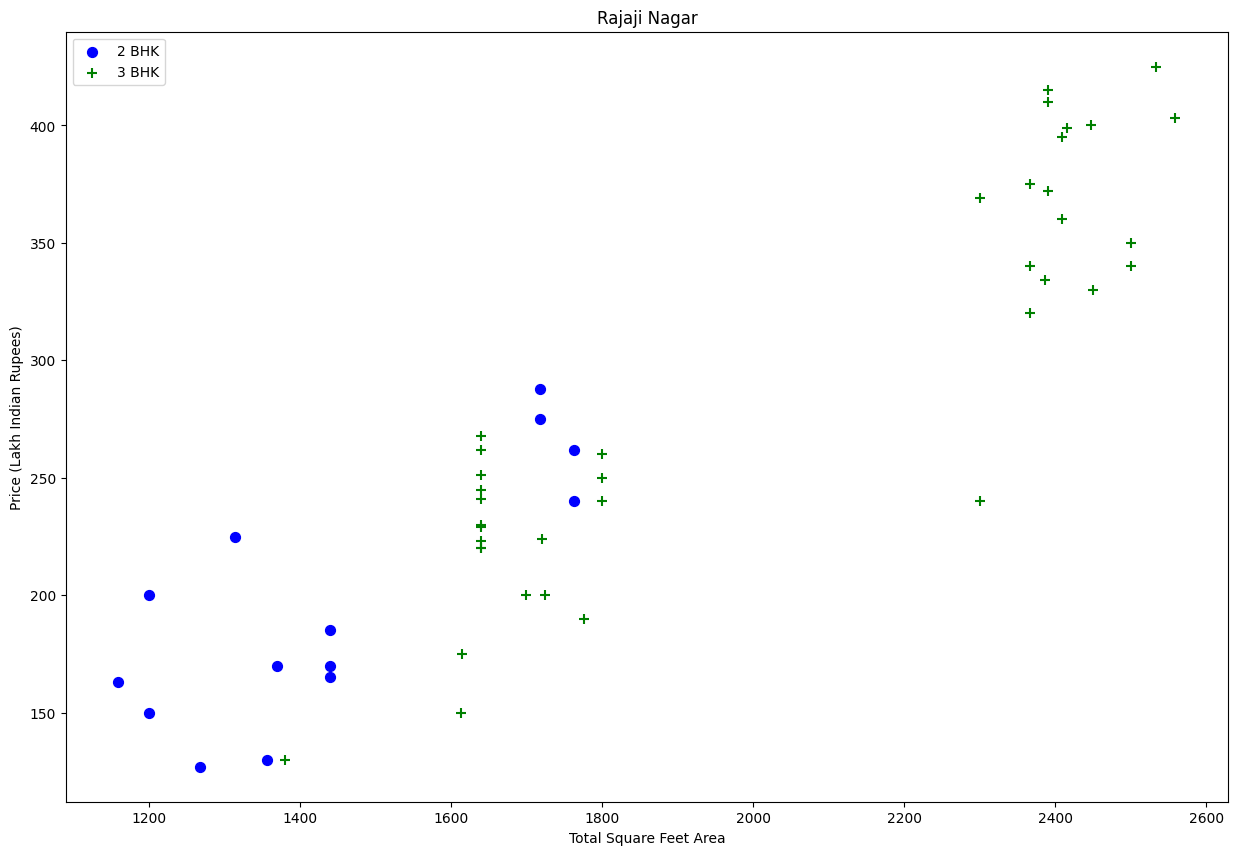

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    # Added the import statement to import matplotlib.pyplot
    # matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.rcParams['figure.figsize'] = (15,10)  #Updated to use plt instead of matplotlib
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        # Changed 'bhk' to 'BHK' to match the actual column name
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        # Changed 'bhk' to 'BHK' to match the actual column name
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.00,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.00,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.00,4,4761.904762
3,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.00,3,3478.260870
4,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.00,2,5360.000000
...,...,...,...,...,...,...,...
9262,manyata park,3 BHK,1780.0,3.0,84.83,3,4765.730337
9263,south,3 Bedroom,2400.0,2.0,480.00,3,20000.000000
9264,tc.palya,2 Bedroom,880.0,2.0,48.00,2,5454.545455
9265,tc.palya,2 Bedroom,1000.0,2.0,55.00,2,5500.000000


Text(0, 0.5, 'Count')

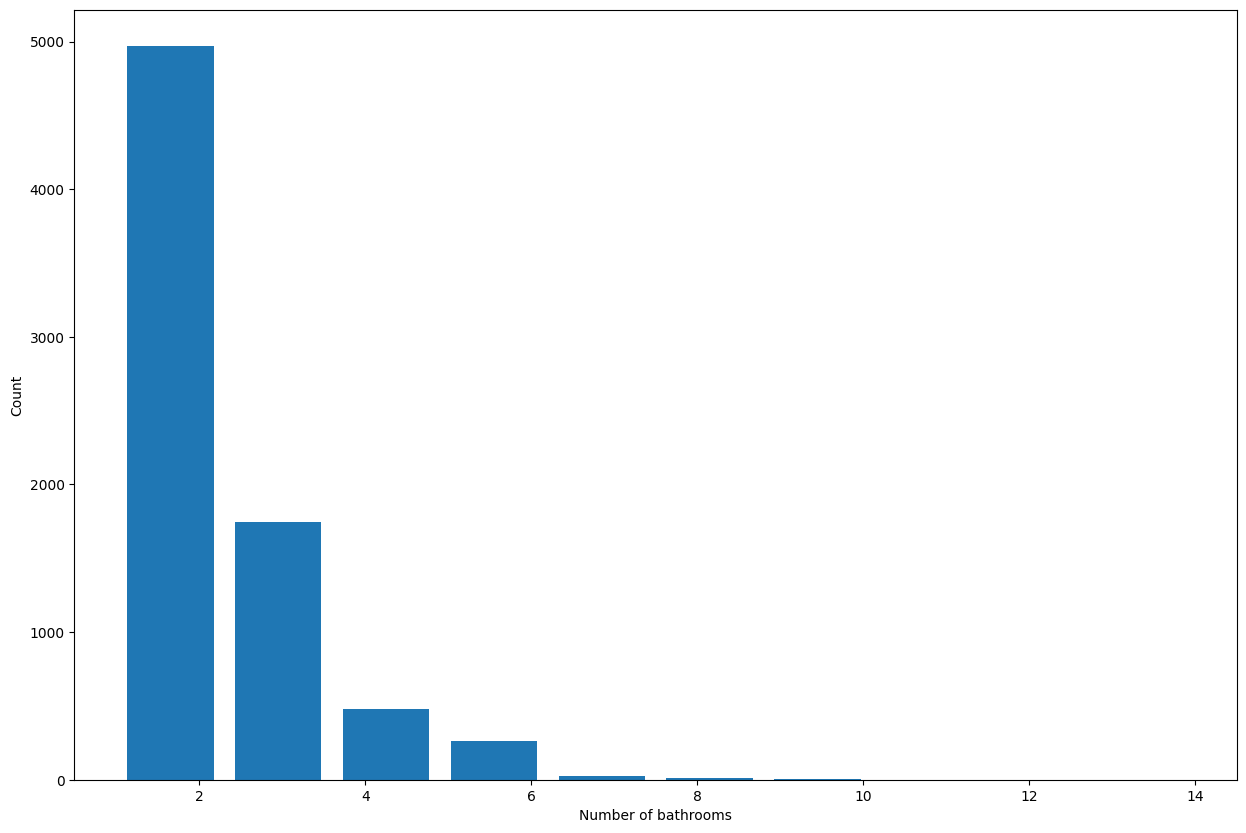

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.00,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.00,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.00,4,4761.904762
3,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.00,3,3478.260870
4,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.00,2,5360.000000
...,...,...,...,...,...,...,...
9262,manyata park,3 BHK,1780.0,3.0,84.83,3,4765.730337
9263,south,3 Bedroom,2400.0,2.0,480.00,3,20000.000000
9264,tc.palya,2 Bedroom,880.0,2.0,48.00,2,5454.545455
9265,tc.palya,2 Bedroom,1000.0,2.0,55.00,2,5500.000000


In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
757,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6183,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [ ]:
df11 =df8[df8.bath>df8.BHK+2]

In [ ]:
df11

,location,size,total_sqft,bath,price,BHK,price_per_sqft
757,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1951,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6117,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7431,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7914,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [ ]:
df9 = df8[df8.bath<df8.BHK+2]

In [ ]:
df9

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.00,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.00,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.00,4,4761.904762
3,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.00,3,3478.260870
4,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.00,2,5360.000000
...,...,...,...,...,...,...,...
9262,manyata park,3 BHK,1780.0,3.0,84.83,3,4765.730337
9263,south,3 Bedroom,2400.0,2.0,480.00,3,20000.000000
9264,tc.palya,2 Bedroom,880.0,2.0,48.00,2,5454.545455
9265,tc.palya,2 Bedroom,1000.0,2.0,55.00,2,5500.000000


In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10

,location,total_sqft,bath,price,BHK
0,1st Block BEL Layout,1540.0,3.0,85.00,3
1,1st Block HBR Layout,600.0,1.0,45.00,1
2,1st Block HBR Layout,3150.0,4.0,150.00,4
3,1st Block HRBR Layout,2300.0,3.0,80.00,3
4,1st Block HRBR Layout,1250.0,2.0,67.00,2
...,...,...,...,...,...
9262,manyata park,1780.0,3.0,84.83,3
9263,south,2400.0,2.0,480.00,3
9264,tc.palya,880.0,2.0,48.00,2
9265,tc.palya,1000.0,2.0,55.00,2


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df10)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
dumy = pd.get_dummies(df10.location , dtype = int)
dumy

In [ ]:
# Instead of dropping 'other', drop a column that actually exists in 'dumy'.
# First, check the columns of 'dumy'
print(dumy.columns)

# Assuming 'Electronic City' is a column in 'dumy', you can drop it:
df11 = pd.concat([df10, dumy.drop('Electronic City', axis='columns')], axis='columns')

# OR, if you specifically want to exclude locations with few data points
# that were grouped into 'other' by pandas.get_dummies:

# 1. Get a list of locations to keep:
# For example, locations appearing more than 10 times in the original df10
location_stats = df10['location'].value_counts()
locations_to_keep = location_stats[location_stats > 10].index.tolist()

# 2. Filter the dummy columns:
dumy_filtered = dumy[[loc for loc in dumy.columns if loc in locations_to_keep]]

# 3. Concatenate:
df11 = pd.concat([df10, dumy_filtered], axis='columns')

In [ ]:
df11 = pd.concat([df10,dumy] ,axis = 'columns')

In [ ]:
df11

In [ ]:
df12 = df11.drop('location',axis='columns')
df12

In [ ]:
y = df12.price
y

In [ ]:
x = df12.drop('price',axis='columns')
x

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.09)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

In [ ]:
def predict_price(location,sqft,bath,bhk):
    global x  # Add this line to tell the function to use the global 'x'
    loc_index = np.where(x.columns==location)[0][0]

    x_input = np.zeros(len(x.columns)) # Change 'x' to a different name like 'x_input'
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk
    if loc_index >= 0:
        x_input[loc_index] = 1

    return lr_clf.predict([x_input])[0] # Use 'x_input' here as well

In [ ]:
predict_price('Whitefield',1800, 2, 4)